In [117]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import datetime

In [118]:
column_types = {'DR Number': 'int64',
 'Date Reported': 'object',
 'Date Occurred': 'object',
 'Time Occurred': 'object',
 'Area ID': 'category',
 'Area Name': 'category',
 'Reporting District': 'category',
 'Crime Code': 'category',
 'Crime Code Description': 'category',
 'MO Codes': 'category',
 'Victim Age': 'uint8',
 'Victim Sex': 'category',
 'Victim Descent': 'category',
 'Premise Code': 'category',
 'Premise Description': 'category',
 'Weapon Used Code': 'category',
 'Weapon Description': 'category',
 'Status Code': 'category',
 'Status Description': 'category',
 'Crime Code 1': 'category',
 'Crime Code 2': 'category',
 'Crime Code 3': 'category',
 'Crime Code 4': 'category',
 'Address': 'category',
 'Cross Street': 'category',
 'Location ': 'category',
 'Full_Time_Occurred': 'object',
 'Weekday': 'category'
}



In [119]:
LA_crimes = pd.read_csv('LA_crimes.csv', dtype = column_types, 
                 parse_dates=['Date Reported', 'Date Occurred', 'Time Occurred', 'Full_Time_Occurred'], 
                 infer_datetime_format = True)
LA_crimes.drop(['Unnamed: 0'], axis=1, inplace=True) 
LA_crimes.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Full_Time_Occurred,Weekday
0,1208575,2013-03-14,2013-03-11,1900-01-01 18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,Adult Other,626.0,0.0,0.0,0.0,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",2013-03-11 18:00:00,Monday
1,102005556,2010-01-25,2010-01-22,1900-01-01 23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,VAN NESS,15TH,"(34.0454, -118.3157)",2010-01-22 23:00:00,Friday
2,418,2013-03-19,2013-03-18,1900-01-01 20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,200 E 104TH ST,NaN,"(33.942, -118.2717)",2013-03-18 20:30:00,Monday
3,101822289,2010-11-11,2010-11-10,1900-01-01 18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,0.0,0.0,0.0,88TH,WALL,"(33.9572, -118.2717)",2010-11-10 18:00:00,Wednesday
4,42104479,2014-01-11,2014-01-04,1900-01-01 23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,Invest Cont,745.0,0.0,0.0,0.0,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",2014-01-04 23:00:00,Saturday


In [120]:
LA_crimes.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692056 entries, 0 to 1692055
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DR Number               int64         
 1   Date Reported           datetime64[ns]
 2   Date Occurred           datetime64[ns]
 3   Time Occurred           datetime64[ns]
 4   Area ID                 category      
 5   Area Name               category      
 6   Reporting District      category      
 7   Crime Code              category      
 8   Crime Code Description  category      
 9   MO Codes                category      
 10  Victim Age              uint8         
 11  Victim Sex              category      
 12  Victim Descent          category      
 13  Premise Code            category      
 14  Premise Description     category      
 15  Weapon Used Code        category      
 16  Weapon Description      category      
 17  Status Code             category      
 18  St

In [121]:
#Сделать дни в неделе в правильном порядке
LA_crimes['Weekday'] = pd.Categorical(LA_crimes['Weekday'], 
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                      ordered = True)

In [122]:
#Стилизировать столбец таблицы общего количества преступлений по дням недели.
index_freq = LA_crimes['Weekday'].value_counts().index
weekdays_freq = pd.DataFrame(LA_crimes['Weekday'].value_counts().values, index = index_freq, columns = ['Weekdays frequency'])
weekdays_freq.style.bar()

,Weekdays frequency
Friday,261154
Saturday,243302
Monday,241094
Wednesday,239585
Thursday,237834
Tuesday,236998
Sunday,232089


In [123]:
#Построить распределение количества преступлений по дням недедли в зависимости от района:
#Линейная диаграмма
index_rasp = 'Area Name'
columns_rasp = 'Weekday'
df2 = LA_crimes.pivot_table('Full_Time_Occurred',index = index_rasp, columns = columns_rasp, aggfunc='count')
df2.head()

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Area Name,,,,,,,
77th Street,17163,16480,16749,16127,17625,16825,16791
Central,10060,9965,9908,10205,11220,11275,10192
Devonshire,11149,11162,11327,11383,12834,10891,10043
Foothill,9333,8969,9236,8959,10158,9208,8969
Harbor,10509,10354,10555,10499,11753,11081,10452


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

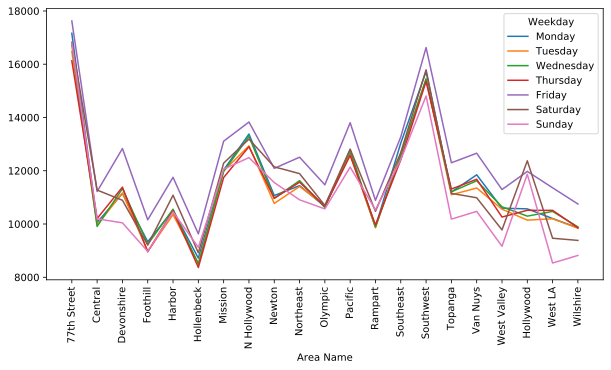

In [124]:
df2.plot(rot = 90, figsize=(10, 5))
plt.xticks(range(0, len(df2.index)), df2.index)
plt.grid

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed3b13d510>,
      dtype=object)

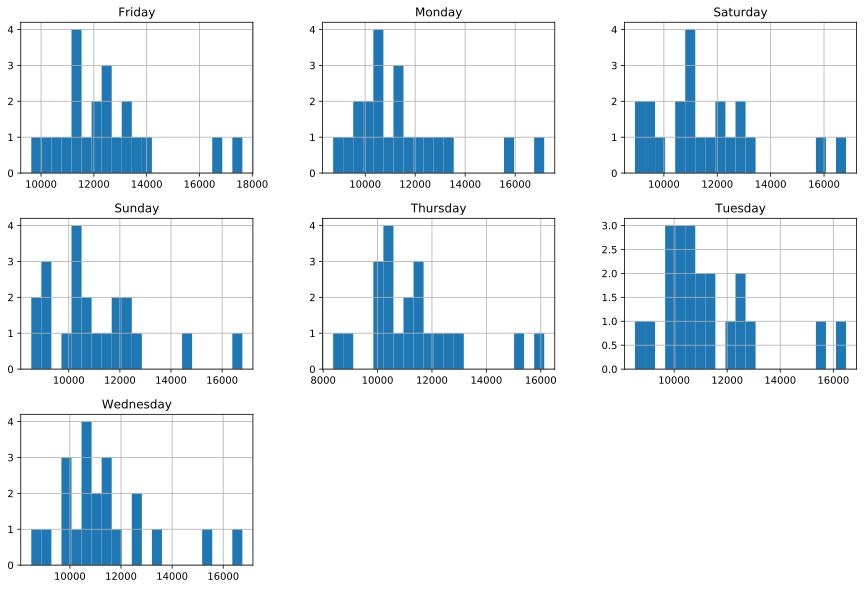

In [125]:
#гистограмма по дням
df2.hist(figsize = (15, 10), column = df2.columns, bins = len(df2.index))

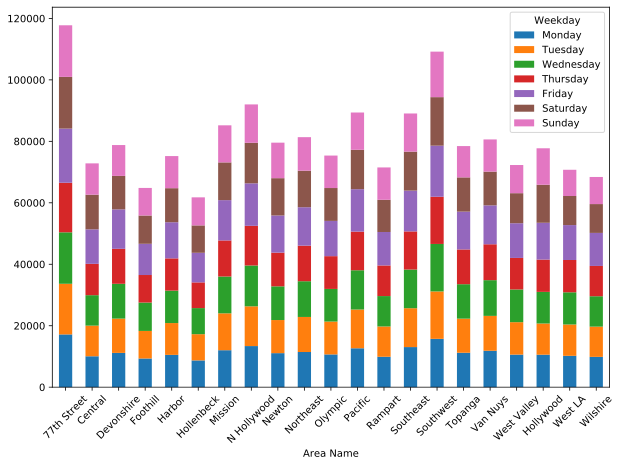

In [126]:
#столбчатая диаграмма накопления
df2.plot(kind='bar', rot=45, figsize=(10, 7), stacked=True)

([<matplotlib.axis.XTick at 0x7fed2792fed0>,
 <a list of 21 Text xticklabel objects>)

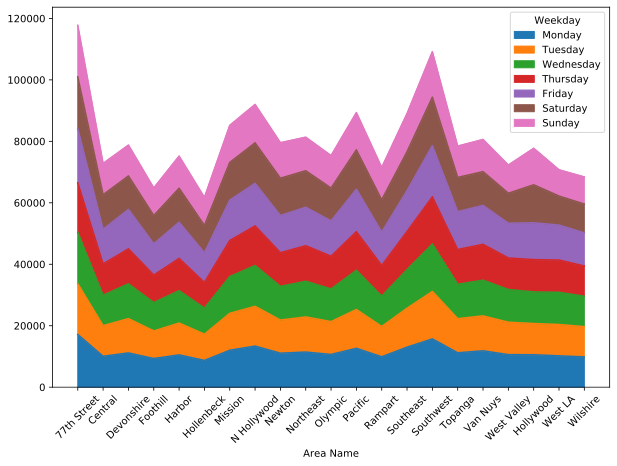

In [127]:
#площадная диаграмма(стыковочная)
df2.plot(kind ='area', rot = 45, figsize = (10, 7), stacked=True)
plt.xticks(range(0, len(df2.index)), df2.index)

([<matplotlib.axis.XTick at 0x7fed2490f890>,
 <a list of 21 Text xticklabel objects>)

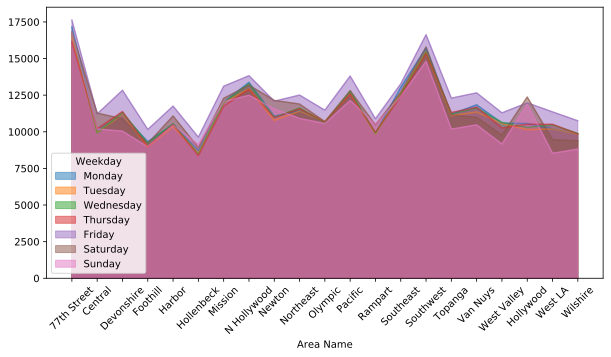

In [128]:
#площадная диаграмма(нестыковочная)
df2.plot(kind ='area', rot = 45, figsize = (10, 5), stacked = False)
plt.xticks(range(0, len(df2.index)), df2.index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed20189e10>,
      dtype=object)

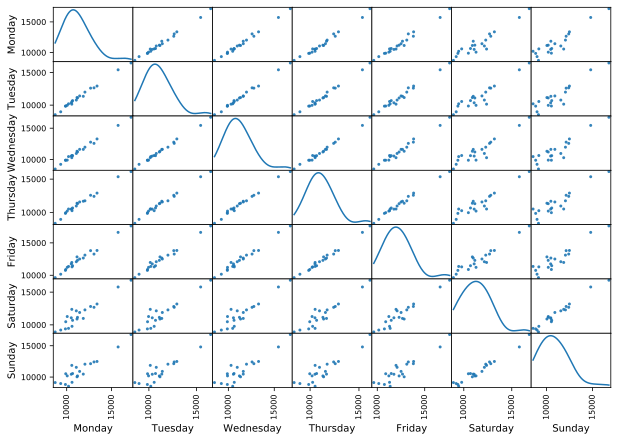

In [129]:
#диаграмма рассеяния количества преступлений по дням недели(scatter_matrix)
from pandas.plotting import scatter_matrix
scatter_matrix(df2, alpha=0.9, figsize=(10, 7), diagonal='kde')

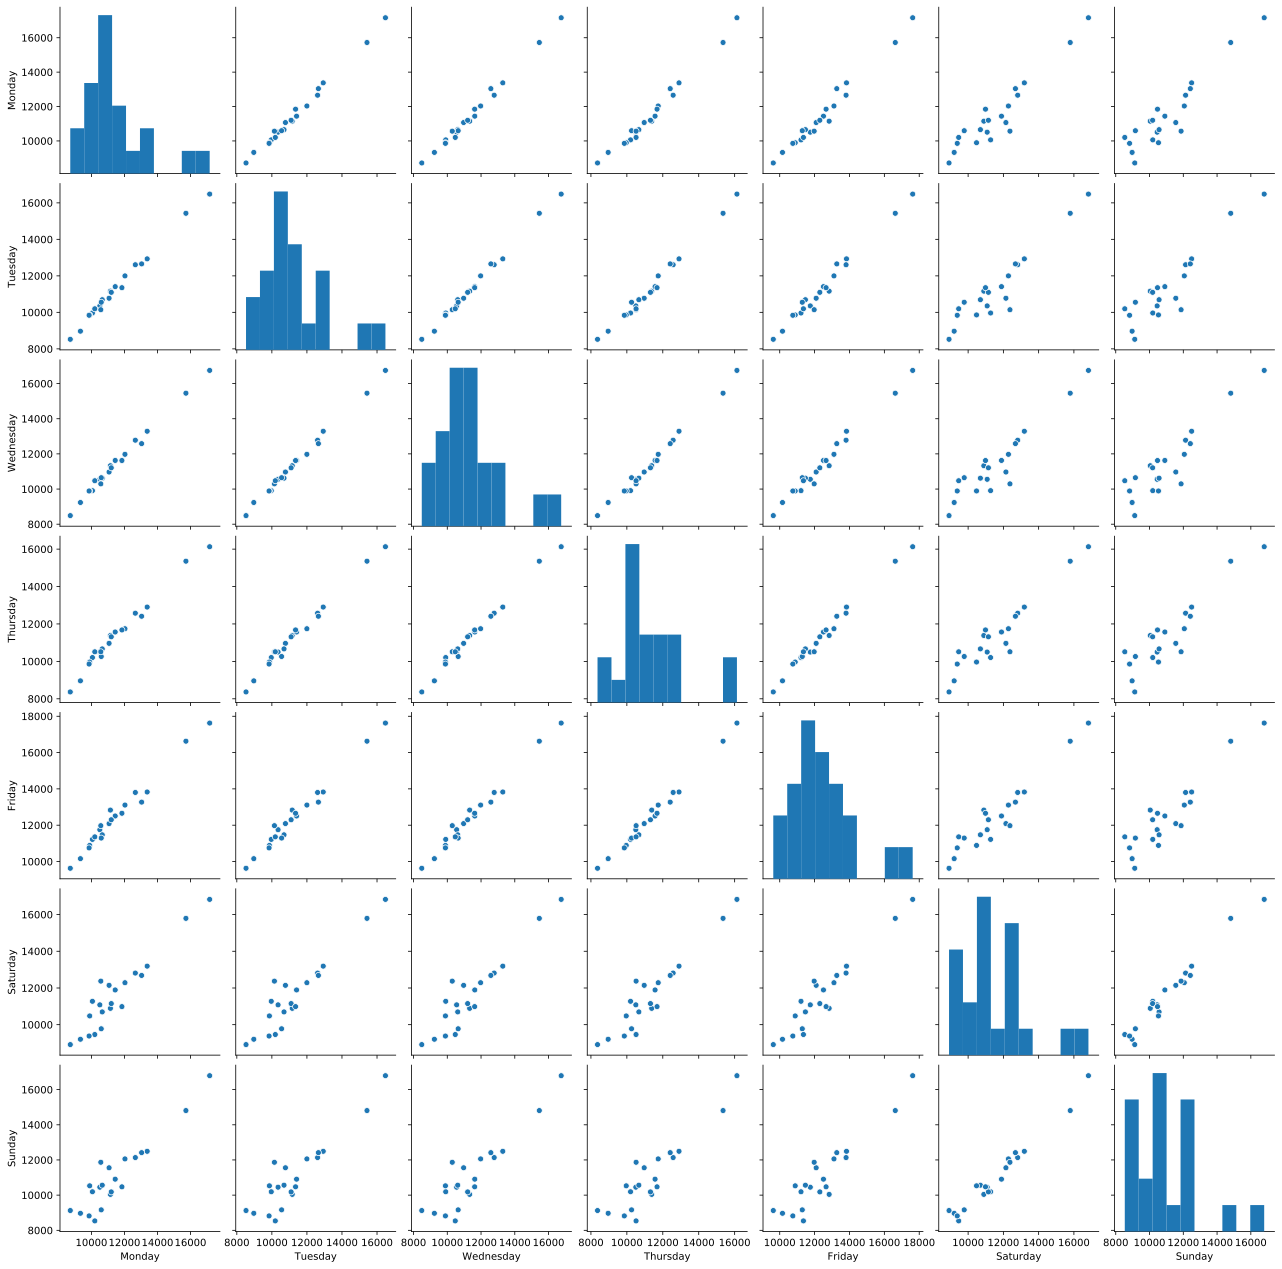

In [130]:
#диаграмма рассеяния количества преступлений по дням недели(pairplot)
import seaborn as sns
sns_df2 = sns.pairplot(df2)

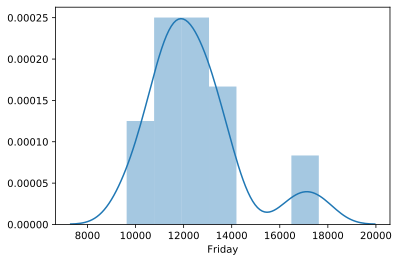

In [131]:
#распределение количества преступлений в любой день недели (например:пятница).
day = 'Friday'
sns.distplot(df2[day])

In [132]:
#Датафрейм с районами и годами
df3 = LA_crimes.pivot_table('Full_Time_Occurred', index = LA_crimes['Full_Time_Occurred'].dt.strftime('%Y'),
                                 columns='Area Name', aggfunc='count')

In [133]:
df3

Area Name,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Mission,N Hollywood,Newton,Northeast,...,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West Valley,Hollywood,West LA,Wilshire
Full_Time_Occurred,,,,,,,,,,,,,,,,,,,,,
2010,14413,7136,10603,9303,9561,7377,10525,11334,9967,10598,...,11076,8681,11046,13622,9887,10055,9225,9186,8157,8161
2011,14220,7162,9612,8481,9815,6519,10501,10672,9328,9813,...,10364,8409,11027,12897,9091,9495,8811,9232,8589,8258
2012,14254,8071,9392,7898,9402,7052,10532,11235,8864,9825,...,10296,8569,10559,13078,8899,9611,8978,9296,8572,8027
2013,13696,7574,8637,7446,8387,6681,10231,10896,8598,9247,...,10085,8114,10153,12674,9054,9340,8355,8516,8143,7805
2014,14006,8352,8602,7091,8262,6883,9879,10346,9179,9646,...,10720,8518,10511,12922,8739,9411,7880,8521,8160,7886
2015,14572,10257,9982,7652,9486,7980,10572,11739,9601,10228,...,11678,9232,11062,13790,9853,10438,8632,9748,9664,8275
2016,15313,10812,10283,7865,9488,9116,10955,11971,10978,10324,...,11726,9141,11426,14088,10927,10397,9569,10530,9331,8999
2017,15338,11836,10501,8028,9591,8933,10671,12243,11622,10381,...,11993,9549,11738,14179,10641,10630,9606,11172,8887,9693
2018,1948,1625,1177,1068,1211,1230,1341,1575,1428,1293,...,1437,1291,1539,1935,1363,1241,1233,1538,1241,1297


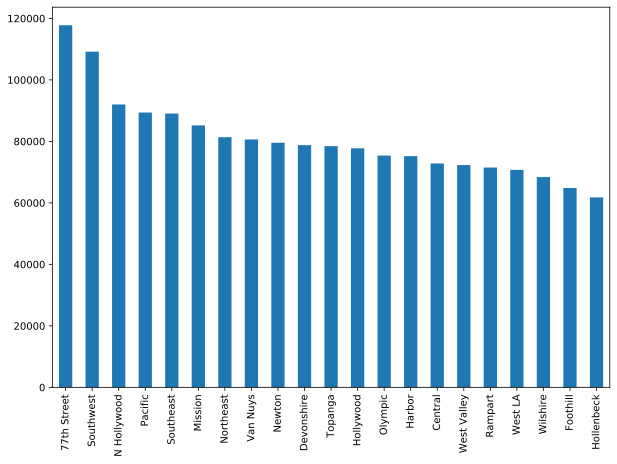

In [134]:
#Анализ количества преступлений по районам:
#гистограмма распределения количества преступлений в зависимости от района
LA_crimes['Area Name'].value_counts().plot(kind = 'bar', figsize=(10, 7))

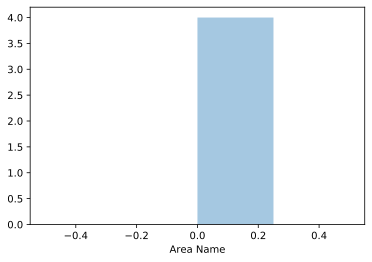

In [135]:
#распределение количества преступлений за любой год (например: 2010 год);
year = 2010
sns.distplot(LA_crimes['Area Name'][LA_crimes['Full_Time_Occurred'].dt.strftime('%Y')==year].value_counts())

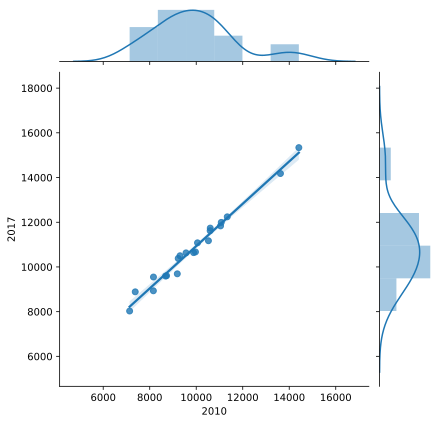

In [136]:
#показать через jointplot динамику изменений количества преступлений в сравнении 2010 и 2017 года;
plot = sns.jointplot(x = LA_crimes['Area Name'][LA_crimes['Full_Time_Occurred'].dt.strftime('%Y') == '2010'].value_counts(),
              y = LA_crimes['Area Name'][LA_crimes['Full_Time_Occurred'].dt.strftime('%Y') =='2017'].value_counts(),
              data = LA_crimes, kind='reg')
plot.set_axis_labels('2010', '2017')
plt.show()

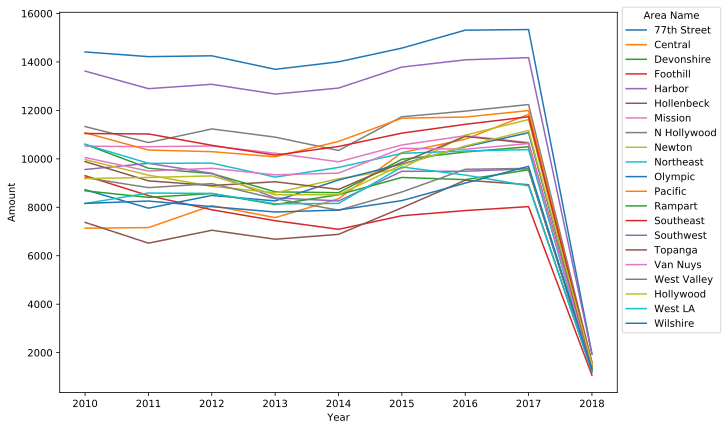

In [137]:
#годовая динамика изменения количества преступлений по районам (линейный график с легендами и удобным масштабом)
df3.plot(figsize = (10, 7))
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(0.9, 0.9), bbox_transform = plt.gcf().transFigure, title = 'Area Name') 

In [138]:
#Анализ преступлений в заданном районе
#количество отдельно взятого вида преступления(110) распределенного по дням недели
central = LA_crimes[LA_crimes['Area Name'] == 'Central']
central.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Full_Time_Occurred,Weekday
5,120125367,2013-01-08,2013-01-08,1900-01-01 14:00:00,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,Adult Arrest,110.0,0.0,0.0,0.0,600 N HILL ST,NaN,"(34.0591, -118.2412)",2013-01-08 14:00:00,Tuesday
16,130100507,2013-01-02,2013-01-02,1900-01-01 14:20:00,1,Central,174,624,BATTERY - SIMPLE ASSAULT,0416 0400 0429,...,Invest Cont,624.0,0.0,0.0,0.0,800 S SPRING ST,NaN,"(34.0431, -118.2536)",2013-01-02 14:20:00,Wednesday
17,130100508,2013-01-02,2013-01-02,1900-01-01 14:30:00,1,Central,134,626,INTIMATE PARTNER - SIMPLE ASSAULT,2004 1218 1813 1814 2002 0444 2000,...,Invest Cont,626.0,0.0,0.0,0.0,4TH,HILL,"(34.0503, -118.2504)",2013-01-02 14:30:00,Wednesday
18,130100509,2013-01-02,2013-01-02,1900-01-01 15:00:00,1,Central,185,624,BATTERY - SIMPLE ASSAULT,0917 0419 0429 0417,...,Juv Arrest,624.0,0.0,0.0,0.0,300 E PICO BL,NaN,"(34.0352, -118.2583)",2013-01-02 15:00:00,Wednesday
19,130100515,2013-01-05,2013-01-04,1900-01-01 17:30:00,1,Central,162,670,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",0344,...,Invest Cont,670.0,0.0,0.0,0.0,700 W 7TH ST,NaN,"(34.048, -118.2577)",2013-01-04 17:30:00,Friday


In [139]:
central_days = central.pivot_table('Full_Time_Occurred', index='Weekday', columns='Crime Code',
                                            aggfunc='count').fillna(value=0)
central_days.head()

Crime Code,110,121,122,210,220,230,231,235,236,237,...,435,470,948,453,822,652,760,814,445,432
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,7.0,65.0,8.0,576.0,77.0,564.0,12.0,6.0,72.0,27.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
Tuesday,21.0,54.0,5.0,556.0,72.0,481.0,19.0,2.0,62.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
Wednesday,9.0,66.0,5.0,529.0,76.0,499.0,20.0,1.0,63.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Thursday,8.0,60.0,10.0,520.0,96.0,593.0,8.0,3.0,75.0,17.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
Friday,8.0,65.0,14.0,549.0,85.0,587.0,8.0,2.0,86.0,8.0,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


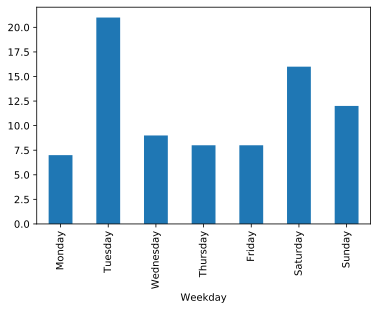

In [140]:
central_days['110'].plot(kind='bar')

In [141]:
#построить таблицу (вид преступления по дням недели)
#и подсветить максимальные и минимальные значения для каждого вида преступления разным цветом

import random
def highlight_max(s):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    is_max = s == s.max()
    return ['background-color:red' if v else '' for v in is_max] 

def highlight_min(s):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    is_max = s == s.min()
    return ['background-color:yellow' if v else '' for v in is_max]

In [142]:
central_days.style.apply(highlight_max).apply(highlight_min)

Crime Code,110,121,122,210,220,230,231,235,236,237,251,310,320,330,331,341,343,345,350,351,352,353,354,410,420,421,433,434,436,437,438,439,440,441,442,443,444,450,451,452,471,474,480,485,510,520,622,623,624,625,626,627,647,648,649,651,653,654,660,661,662,664,666,668,670,740,745,753,755,756,761,762,763,805,806,810,812,813,815,820,821,840,850,860,882,884,886,888,890,900,901,902,910,920,922,928,930,932,933,940,942,943,946,949,950,951,954,956,870,931,944,250,473,903,924,435,470,948,453,822,652,760,814,445,432
Weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Monday,7.000000,65.000000,8.000000,576.000000,77.000000,564.000000,12.000000,6.000000,72.000000,27.000000,0.000000,299.000000,12.000000,654.000000,86.000000,450.000000,16.000000,0.000000,170.000000,16.000000,15.000000,0.000000,331.000000,8.000000,213.000000,0.000000,3.000000,4.000000,0.000000,21.000000,2.000000,0.000000,1170.000000,8.000000,307.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,214.000000,0.000000,342.000000,5.000000,1.000000,55.000000,1435.000000,22.000000,405.000000,8.000000,10.000000,26.000000,125.000000,4.000000,4.000000,1.000000,4.000000,10.000000,39.000000,28.000000,4.000000,42.000000,6.000000,387.000000,443.000000,2.000000,14.000000,4.000000,91.000000,15.000000,4.000000,0.000000,0.000000,6.000000,8.000000,5.000000,10.000000,4.000000,10.000000,1.000000,32.000000,90.000000,0.000000,0.000000,21.000000,153.000000,2.000000,38.000000,46.000000,5.000000,15.000000,2.000000,2.000000,9.000000,329.000000,9.000000,2.000000,6.000000,2.000000,3.000000,184.000000,2.000000,2.000000,17.000000,0.000000,81.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
Tuesday,21.000000,54.000000,5.000000,556.000000,72.000000,481.000000,19.000000,2.000000,62.000000,9.000000,5.000000,301.000000,8.000000,691.000000,88.000000,488.000000,16.000000,1.000000,159.000000,19.000000,15.000000,1.000000,307.000000,19.000000,217.000000,4.000000,2.000000,2.000000,0.000000,26.000000,1.000000,4.000000,1108.000000,7.000000,331.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,216.000000,0.000000,347.000000,6.000000,2.000000,58.000000,1377.000000,21.000000,422.000000,7.000000,10.000000,12.000000,114.000000,5.000000,5.000000,4.000000,9.000000,5.000000,40.000000,23.000000,3.000000,42.000000,7.000000,386.000000,407.000000,3.000000,25.000000,1.000000,98.000000,9.000000,8.000000,1.000000,2.000000,6.000000,10.000000,3.000000,18.000000,13.000000,10.000000,0.000000,26.000000,69.000000,0.000000,1.000000,20.000000,158.000000,2.000000,35.000000,54.000000,5.000000,10.000000,2.000000,4.000000,10.000000,332.000000,5.000000,1.000000,9.000000,0.000000,7.000000,262.000000,1.000000,1.000000,27.000000,0.000000,71.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
Wednesday,9.000000,66.000000,5.000000,529.000000,76.000000,499.000000,20.000000,1.000000,63.000000,6.000000,2.000000,301.000000,12.000000,636.000000,73.000000,470.000000,9.000000,1.000000,145.000000,16.000000,15.000000,0.000000,292.000000,20.000000,237.000000,1.000000,5.000000,4.000000,0.000000,23.000000,0.000000,4.000000,1128.000000,14.000000,326.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,216.000000,2.000000,346.000000,5.000000,3.000000,71.000000,1505.000000,19.000000,366.000000,8.000000,10.000000,13.000000,107.000000,3.000000,3.000000,0.000000,5.000000,7.000000,46.000000,32.000000,6.000000,38.000000,7.000000,417.000000,386.000000,4.000000,13.000000,2.000000,82.000000,9.000000,13.000000,1.000000,0.000000,6.000000,10.000000,8.000000,10.000000,5.000000,15.000000,0.000000,25.000000,79.000000,0.000000,2.000000,21.000000,148.000000,0.000000,36.000000,47.000000,3.000000,11.000000,0.000000,3.000000,10.000000

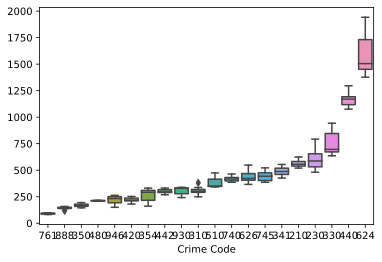

In [143]:
#сравнение распределения 20 наиболее часто встречающихся преступлений по дня недели для заданного района
#(показать через boxplot)

twenty_central_days = central_days.sum().sort_values()[-20:].index
sns.boxplot(data = central_days[twenty_central_days])

In [144]:
#проанализировать коэфициент корреляции вида преступления и дня недели 
#(результат в виде heatmap на которой отображено только корреляция вида преступления от дня недели)
#Выбираем столбцы вид преступления и день недели
weekday_cor = LA_crimes[['Crime Code Description', 'Weekday']] 
weekday_cor['Weekday'] = weekday_cor['Weekday'].cat.codes 
df4 = pd.get_dummies(weekday_cor['Crime Code Description']) 
                                                              
corr = df4.corrwith(weekday_cor['Weekday']) 
corr = pd.DataFrame(corr) 
corr.rename(columns={0 : 'Correlation'}, inplace = True)
corr.head()

,Correlation
ABORTION/ILLEGAL,0.000515
ARSON,0.000555
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,-0.000904
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0.024617
ATTEMPTED ROBBERY,-0.000165


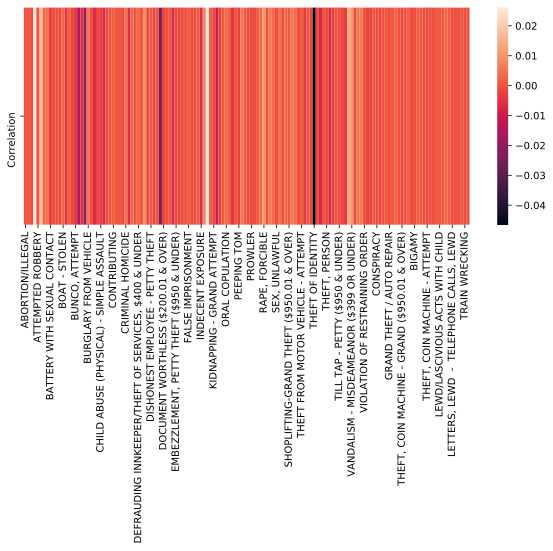

In [145]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(corr.transpose())

Text(0.5, 0, 'Районы')

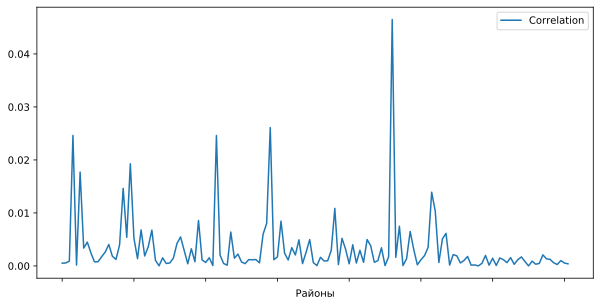

In [146]:
#линейный график коэффициент корреляции дня недели и вида преступления в абсолютных значениях
corr = abs(corr)
corr.plot(rot = 90, figsize=(10, 5))
plt.xlabel('Районы')

In [147]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.offline as offline
import plotly.graph_objs as go

In [148]:
#построить линейный график для трех любых районов

streets = ['77th Street','Central','Mission']
data_streets = []

for street in streets:
    trace0 = go.Scatter(
        x=df2.columns,y=df2.loc[street],name=street)
    data_streets.append(trace0)
    
fig = go.Figure(data = data_streets)
offline.iplot(fig, show_link=False)

In [149]:
#построить линейный график для всех районов сразу
data_all_streets = []
for street in df2.index:
    trace0 = go.Scatter(x = df2.columns, y = df2.loc[street],name=street)
    data_all_streets.append(trace0)
    
fig = go.Figure(data = data_all_streets)
iplot(fig, show_link=False)

In [150]:
#Доля преступлений в конкретном районе от общего количества
#Bar график для всех районов по всей статистикe
df6 = pd.DataFrame(LA_crimes['Area Name'].value_counts())
df6.rename(columns={'Area Name' : 'Number of crimes'}, inplace = True)
total = df6['Number of crimes'].sum()
df6['Percentage'] = df6['Number of crimes'] * 100 / total
df6

,Number of crimes,Percentage
77th Street,117760,6.959581
Southwest,109185,6.452801
N Hollywood,92011,5.437822
Pacific,89375,5.282036
Southeast,89061,5.263478
Mission,85207,5.035708
Northeast,81355,4.808056
Van Nuys,80618,4.764500
Newton,79565,4.702268
Devonshire,78789,4.656406


In [151]:
fig = go.Figure(data=go.Bar(x=df6.index, y=df6['Percentage']),
                    layout={'title': 'Доля преступлений в конкретном районе от общего количества'})
offline.iplot(fig, show_link=False) 

In [152]:
#Bar график для всех районов по годам.
#воспользуемся датафреймом из 3 задания
df6_2 = df3.transpose()
df6_2

Full_Time_Occurred,2010,2011,2012,2013,2014,2015,2016,2017,2018
Area Name,,,,,,,,,
77th Street,14413,14220,14254,13696,14006,14572,15313,15338,1948
Central,7136,7162,8071,7574,8352,10257,10812,11836,1625
Devonshire,10603,9612,9392,8637,8602,9982,10283,10501,1177
Foothill,9303,8481,7898,7446,7091,7652,7865,8028,1068
Harbor,9561,9815,9402,8387,8262,9486,9488,9591,1211
Hollenbeck,7377,6519,7052,6681,6883,7980,9116,8933,1230
Mission,10525,10501,10532,10231,9879,10572,10955,10671,1341
N Hollywood,11334,10672,11235,10896,10346,11739,11971,12243,1575
Newton,9967,9328,8864,8598,9179,9601,10978,11622,1428


In [153]:
#переводим в процентное соотношение
for column in df6_2.columns:
    df6_2[column] = df6_2[column] * 100 / df_task6_2[column].sum()
df6_2

Full_Time_Occurred,2010,2011,2012,2013,2014,2015,2016,2017,2018
Area Name,,,,,,,,,
77th Street,14413.0,14220.0,14254.0,13696.0,14006.0,14572.0,15313.0,15338.0,1948.0
Central,7136.0,7162.0,8071.0,7574.0,8352.0,10257.0,10812.0,11836.0,1625.0
Devonshire,10603.0,9612.0,9392.0,8637.0,8602.0,9982.0,10283.0,10501.0,1177.0
Foothill,9303.0,8481.0,7898.0,7446.0,7091.0,7652.0,7865.0,8028.0,1068.0
Harbor,9561.0,9815.0,9402.0,8387.0,8262.0,9486.0,9488.0,9591.0,1211.0
Hollenbeck,7377.0,6519.0,7052.0,6681.0,6883.0,7980.0,9116.0,8933.0,1230.0
Mission,10525.0,10501.0,10532.0,10231.0,9879.0,10572.0,10955.0,10671.0,1341.0
N Hollywood,11334.0,10672.0,11235.0,10896.0,10346.0,11739.0,11971.0,12243.0,1575.0
Newton,9967.0,9328.0,8864.0,8598.0,9179.0,9601.0,10978.0,11622.0,1428.0


In [154]:
traces6_2 = []
for i in df6_2.index:
    traces6_2.append(go.Bar(x=df6_2.columns, y=df6_2.loc[i], name = i))  
layout6_2 = {'title': 'Доля преступлений в конкретном районе от общего количества по годам'}
fig = go.Figure(data = traces6_2, layout = layout6_2)
offline.iplot(fig, show_link=False)

In [155]:
#box график статистики всех преступлений в распределении по годам.
data = []
for year in df3.index:
    data.append(go.Box(y=df3.loc[year], name = year))   
offline.iplot(data, show_link = False)

In [156]:
#Интерактивный график: количество преступлений от дня недели для отдельного района;
#используем датафрейм из второго задания
df8 = df2.transpose()

traces8_1 = []
for district in df8.columns:
    traces8_1.append(
        go.Scatter(
            x=df8[district].index,
            y=df8[district].values,
            name = district, 
            visible = (district == '77th Street'))
    )


buttons8_1 = []
counter = 0

for i in df8.columns:
    buttons8_1.append(dict(
        args = ['visible', [False]*counter + [True] + [False]*(len(df8.columns)-1)],
        label = i, 
        method = 'restyle'
    ))
    counter += 1
layout8 = go.Layout(title='количество преступлений от дня недели для отдельного района', 
                   updatemenus=list([dict(x=-0.05, y=1, yanchor='top', buttons=buttons8_1)]))

fig8_1 = {'data': traces8_1, 'layout': layout8}
offline.iplot(fig8_1, show_link=False)

In [157]:
#количество преступлений от района для отдельного дня недели.
traces8_2 = []
for day in df2.columns:
    traces8_2.append(
        go.Scatter(
            x=df2[day].index,
            y=df2[day].values,
            name = day, 
            visible = (day == 'Monday'))
    )   
buttons8_2 = []
counter = 0
for i in df2.columns:
    buttons8_2.append(dict(
        args=['visible', [False]*counter + [True] + [False]*(len(df2.columns)-1)],
        label=i, 
        method='restyle'
    ))
    counter += 1
layout8_2 = go.Layout(title='количество преступлений от района для отдельного дня недели', 
                   updatemenus=list([dict(x=-0.05, y=1, yanchor='top', buttons=buttons8_2)]))

fig8_2 = {'data': traces8_2, 'layout': layout8_2}
offline.iplot(fig8_2, show_link=False)